## Decision Tree Implementation
We'll be implementing the Decision tree algorithm on a dataset of Type of Drug to be administered to a future patient

FYI: Post pruning is carried out on a smaller dataset, while Pre-pruning on a larger one

#### We will also implement Cost_complexity_pruning 

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv("C:\\Rig\\Work\\ML ig\\Suitable_Meds.csv")

In [171]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
193,72,M,LOW,HIGH,6.769,drugC
28,39,F,LOW,NORMAL,22.697,drugY
116,67,M,NORMAL,NORMAL,9.514,drugX
89,50,F,NORMAL,NORMAL,17.211,drugY
15,16,F,HIGH,NORMAL,15.516,drugY


In [173]:
df.shape

(200, 6)

In [175]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

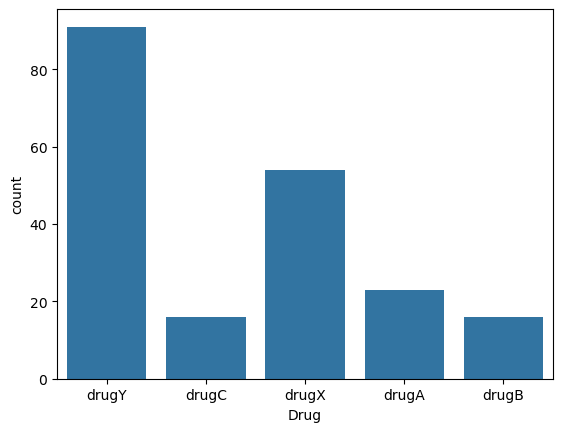

In [189]:
p = sns.countplot(x = df['Drug'])
plt.show()

Instead of using map function to map each feature to a number, we can use __Label Encoder__ or __Ordinal Encoder__. Since we need to preserve the ordinal relationship(Low=0, Normal=1, High=2) , we use Ordinal Encoder.

In [192]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[['BP','Sex','Cholesterol','Drug']] = oe.fit_transform(df[['BP','Sex','Cholesterol','Drug']])

In [194]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
67,17,1.0,2.0,1.0,10.832,3.0
190,58,1.0,0.0,0.0,18.991,4.0
14,50,0.0,2.0,0.0,12.703,3.0
91,41,1.0,0.0,1.0,15.156,4.0
47,68,1.0,1.0,0.0,10.291,2.0


In [196]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [198]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [200]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()  

In [204]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.625, 0.9, 'x[4] <= -0.189\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= -0.515\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 0.319\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.679\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.101\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

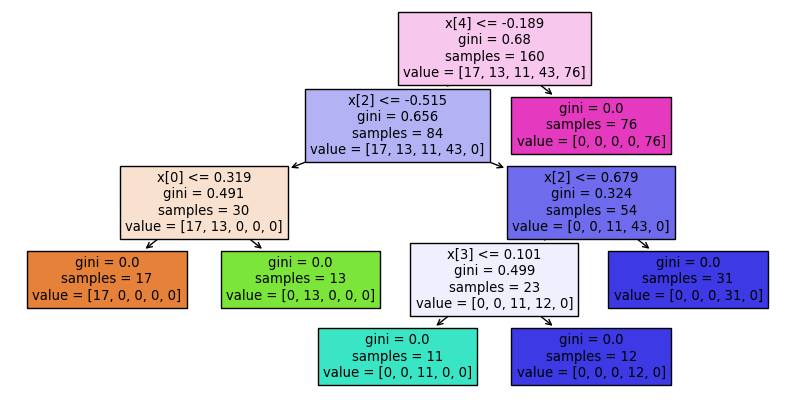

In [206]:
from sklearn import tree

plt.figure(figsize=(10,5))
tree.plot_tree(tree_model, filled=True)

In [208]:
y_pred = tree_model.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 1.0


#### Welp. Thats __too much__ accuracy. Definitely Over-Fitting

## Pre-pruning

In [214]:
from sklearn.model_selection import GridSearchCV

In [218]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
     'max_depth':[2,3,4,5],
    'ccp_alpha':[0.0,0.005,0.01,0.05,0.1]
}

In [220]:
dt = DecisionTreeClassifier()
cv = GridSearchCV(dt, param_grid=parameters, cv=5, scoring='accuracy')

In [222]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.005, 0.01, 0.05, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [224]:
cv.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [226]:
y_pred_cv = cv.predict(X_test)

In [228]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 1.0


## Cost Complexity Pruning (ccp)
Since there is overfitting problem, we will use this technique.

In [230]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [232]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

##### We will plot the following graph to know get the value of ccp_alpha for __Low-bias, Low Variance__

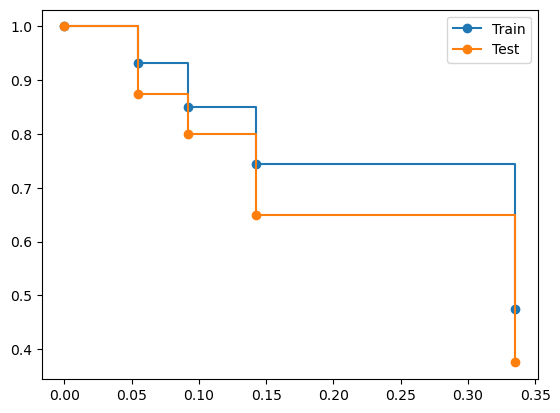

In [98]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle='steps-post')
ax.legend()

In [238]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.06)  #0.06, based on above graph
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.06, random_state=0)

In [240]:
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.875


[Text(0.6666666666666666, 0.875, 'x[4] <= -0.189\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.625, 'x[2] <= -0.515\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.319\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

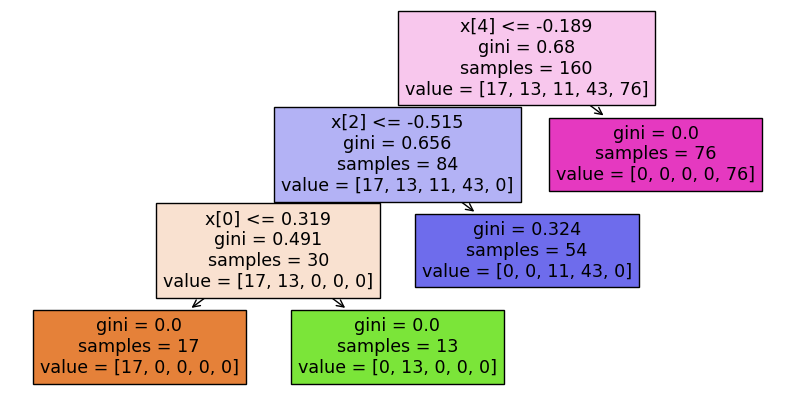

In [242]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf, filled=True)

Done!

We can also see that the Decision tree gets pruned to a depth of __3__ instead of the previous __4__